## Model Random Forest Classifier only

In [1]:
# Necessary libraries imported
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv('D:/WittingAI/dataset/SalesKaggle3.csv')

In [3]:
df.head()

,Order,File_Type,SKU_number,SoldFlag,SoldCount,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice
0,2,Historical,1737127,0.0,0.0,D,15,1,682743.0,44.99,2015,8,28.97,31.84
1,3,Historical,3255963,0.0,0.0,D,7,1,1016014.0,24.81,2005,39,0.00,15.54
2,4,Historical,612701,0.0,0.0,D,0,0,340464.0,46.00,2013,34,30.19,27.97
3,6,Historical,115883,1.0,1.0,D,4,1,334011.0,100.00,2006,20,133.93,83.15
4,7,Historical,863939,1.0,1.0,D,2,1,1287938.0,121.95,2010,28,4.00,23.99


In [4]:
print("Information About Dataset", "\n")
print("="*30)
df.describe()

Information About Dataset 



,Order,SKU_number,SoldFlag,SoldCount,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice
count,198917.000000,1.989170e+05,75996.000000,75996.000000,198917.000000,198917.000000,1.989170e+05,198917.000000,198917.000000,198917.000000,198917.000000,198917.000000
mean,106483.543242,8.613626e+05,0.171009,0.322306,3.412202,0.642248,1.117115e+06,90.895243,2006.016414,41.426283,30.982487,46.832053
std,60136.716784,8.699794e+05,0.376519,1.168615,3.864243,0.479340,1.522090e+06,86.736367,9.158331,37.541215,69.066155,128.513236
min,2.000000,5.000100e+04,0.000000,0.000000,0.000000,0.000000,6.275000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55665.000000,2.172520e+05,0.000000,0.000000,1.000000,0.000000,1.614188e+05,42.000000,2003.000000,21.000000,4.910000,17.950000
50%,108569.000000,6.122080e+05,0.000000,0.000000,2.000000,1.000000,5.822240e+05,69.950000,2007.000000,32.000000,16.080000,33.980000
75%,158298.000000,9.047510e+05,0.000000,0.000000,5.000000,1.000000,1.430083e+06,116.000000,2011.000000,50.000000,40.240000,55.490000
max,208027.000000,3.960788e+06,1.000000,73.000000,99.000000,1.000000,1.738445e+07,12671.480000,2018.000000,2542.000000,14140.210000,19138.790000


In [5]:
print("Null Values", "\n")
print("="*30)
print(df.isnull().sum())

Null Values 

Order                    0
File_Type                0
SKU_number               0
SoldFlag            122921
SoldCount           122921
MarketingType            0
ReleaseNumber            0
New_Release_Flag         0
StrengthFactor           0
PriceReg                 0
ReleaseYear              0
ItemCount                0
LowUserPrice             0
LowNetPrice              0
dtype: int64


In [6]:
print("Information of Values", "\n")
print("="*30)
print(df.info())

Information of Values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198917 entries, 0 to 198916
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order             198917 non-null  int64  
 1   File_Type         198917 non-null  object 
 2   SKU_number        198917 non-null  int64  
 3   SoldFlag          75996 non-null   float64
 4   SoldCount         75996 non-null   float64
 5   MarketingType     198917 non-null  object 
 6   ReleaseNumber     198917 non-null  int64  
 7   New_Release_Flag  198917 non-null  int64  
 8   StrengthFactor    198917 non-null  float64
 9   PriceReg          198917 non-null  float64
 10  ReleaseYear       198917 non-null  int64  
 11  ItemCount         198917 non-null  int64  
 12  LowUserPrice      198917 non-null  float64
 13  LowNetPrice       198917 non-null  float64
dtypes: float64(6), int64(6), object(2)
memory usage: 21.2+ MB
None


In [7]:
print("Shape of dataset: ", df.shape)

Shape of dataset:  (198917, 14)


In [8]:
# from scikit_learn import different tools for preictive data analysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
import warnings
warnings.filterwarnings("ignore")

<Axes: title={'center': 'Freq dist of Marketing Type'}, xlabel='MarketingType'>

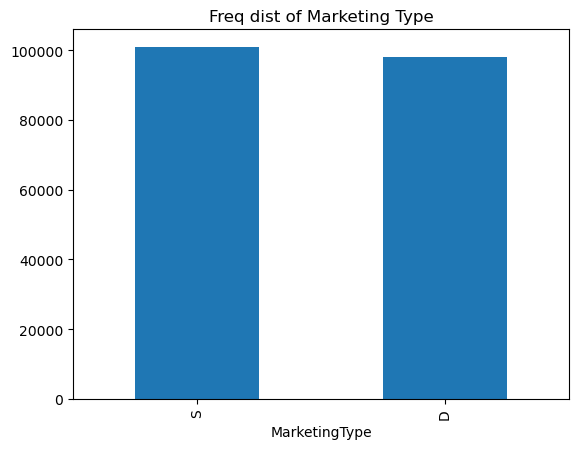

In [9]:
df['MarketingType'].value_counts().plot.bar(title="Freq dist of Marketing Type")

In [10]:
df.tail()

,Order,File_Type,SKU_number,SoldFlag,SoldCount,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice
198912,208023,Active,109683,NaN,NaN,D,7,1,210186.8663,72.87,2006,54,8.46,60.59
198913,208024,Active,416462,NaN,NaN,D,8,1,455504.0650,247.00,2009,65,8.40,74.85
198914,208025,Active,658242,NaN,NaN,S,2,1,169274.5688,50.00,2012,23,23.98,32.62
198915,208026,Active,2538340,NaN,NaN,S,2,1,377526.6063,46.95,2001,23,27.42,37.89
198916,208027,Active,416662,NaN,NaN,D,15,1,118306.8275,120.00,2010,44,10.97,60.67


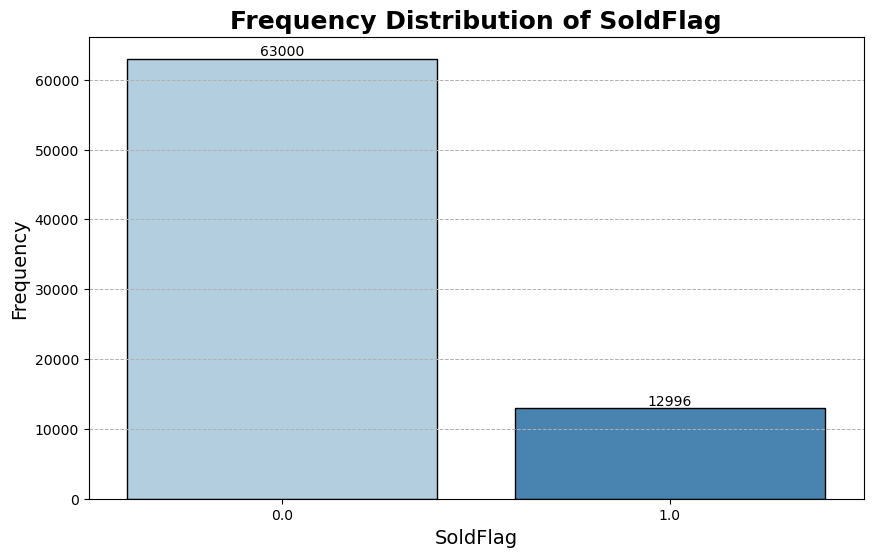

In [11]:
# Calculate frequency counts for 'SoldFlag'
sold_flag_freq = df['SoldFlag'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=sold_flag_freq.index, y=sold_flag_freq.values, palette='Blues', edgecolor='black')

# Add value labels on top of bars
for index, value in enumerate(sold_flag_freq.values):
    plt.text(index, value + 0.5, str(value), ha='center', va='bottom', fontsize=10)

# Plot settings
plt.title("Frequency Distribution of SoldFlag", fontsize=18, fontweight='bold')
plt.xlabel("SoldFlag", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(visible=True, which='both', axis='y', linestyle='--', linewidth=0.7)
plt.show()

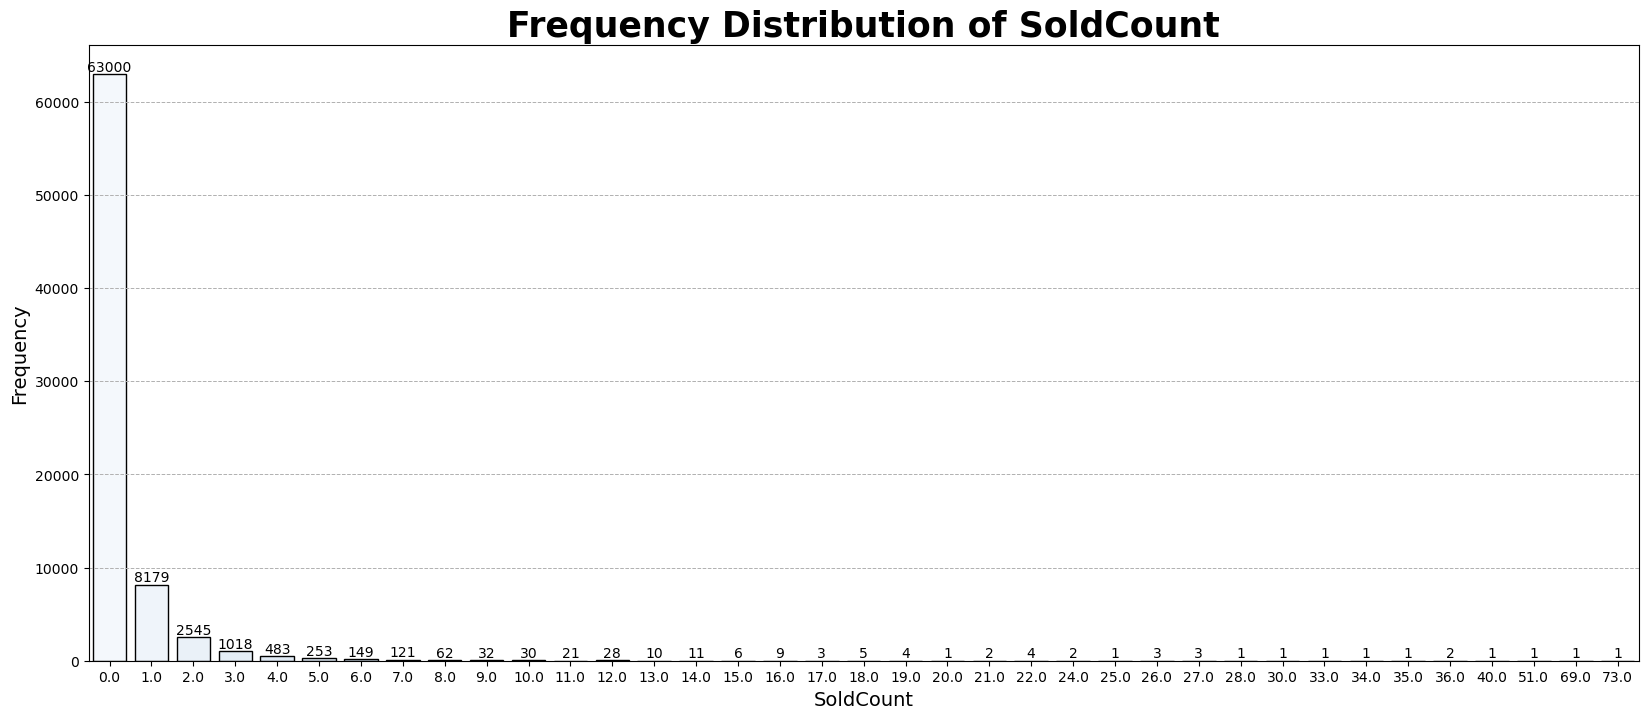

In [12]:
# Calculate frequency counts for 'Sold Count'
sold_count_freq = df['SoldCount'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(20, 8))
sns.barplot(x=sold_count_freq.index, y=sold_count_freq.values, palette='Blues', edgecolor='black')

# Add value labels on top of bars
for index, value in enumerate(sold_count_freq.values):
    plt.text(index, value + 0.5, str(value), ha='center', va='bottom', fontsize=10)

# Plot settings
plt.title("Frequency Distribution of SoldCount", fontsize=25, fontweight='bold')
plt.xlabel("SoldCount", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(visible=True, which='both', axis='y', linestyle='--', linewidth=0.7)
plt.show()

<Axes: title={'center': 'Freq dist of File Type'}, xlabel='File_Type'>

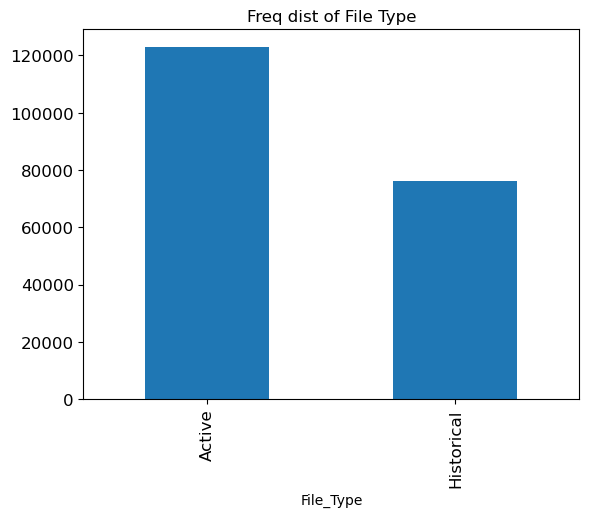

In [13]:
df['File_Type'].value_counts().plot.bar(title="Freq dist of File Type", fontsize=12)

<Axes: title={'center': 'Freq dist of New_Release_Flag'}, xlabel='New_Release_Flag'>

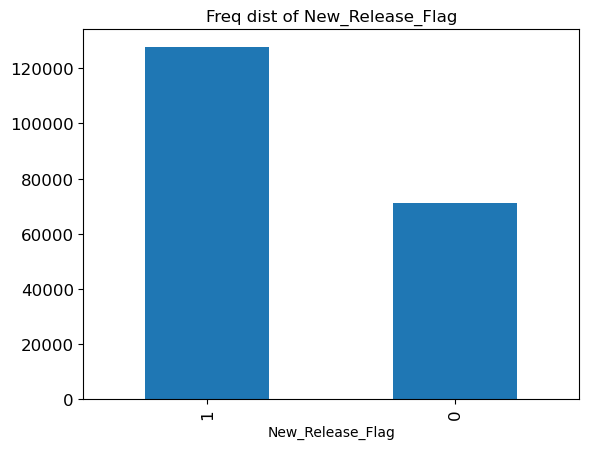

In [14]:
df['New_Release_Flag'].value_counts().plot.bar(title="Freq dist of New_Release_Flag", fontsize=12)

In [19]:
# Removing all active counts due to null values
hist_data = df[df['File_Type'] == 'Historical']

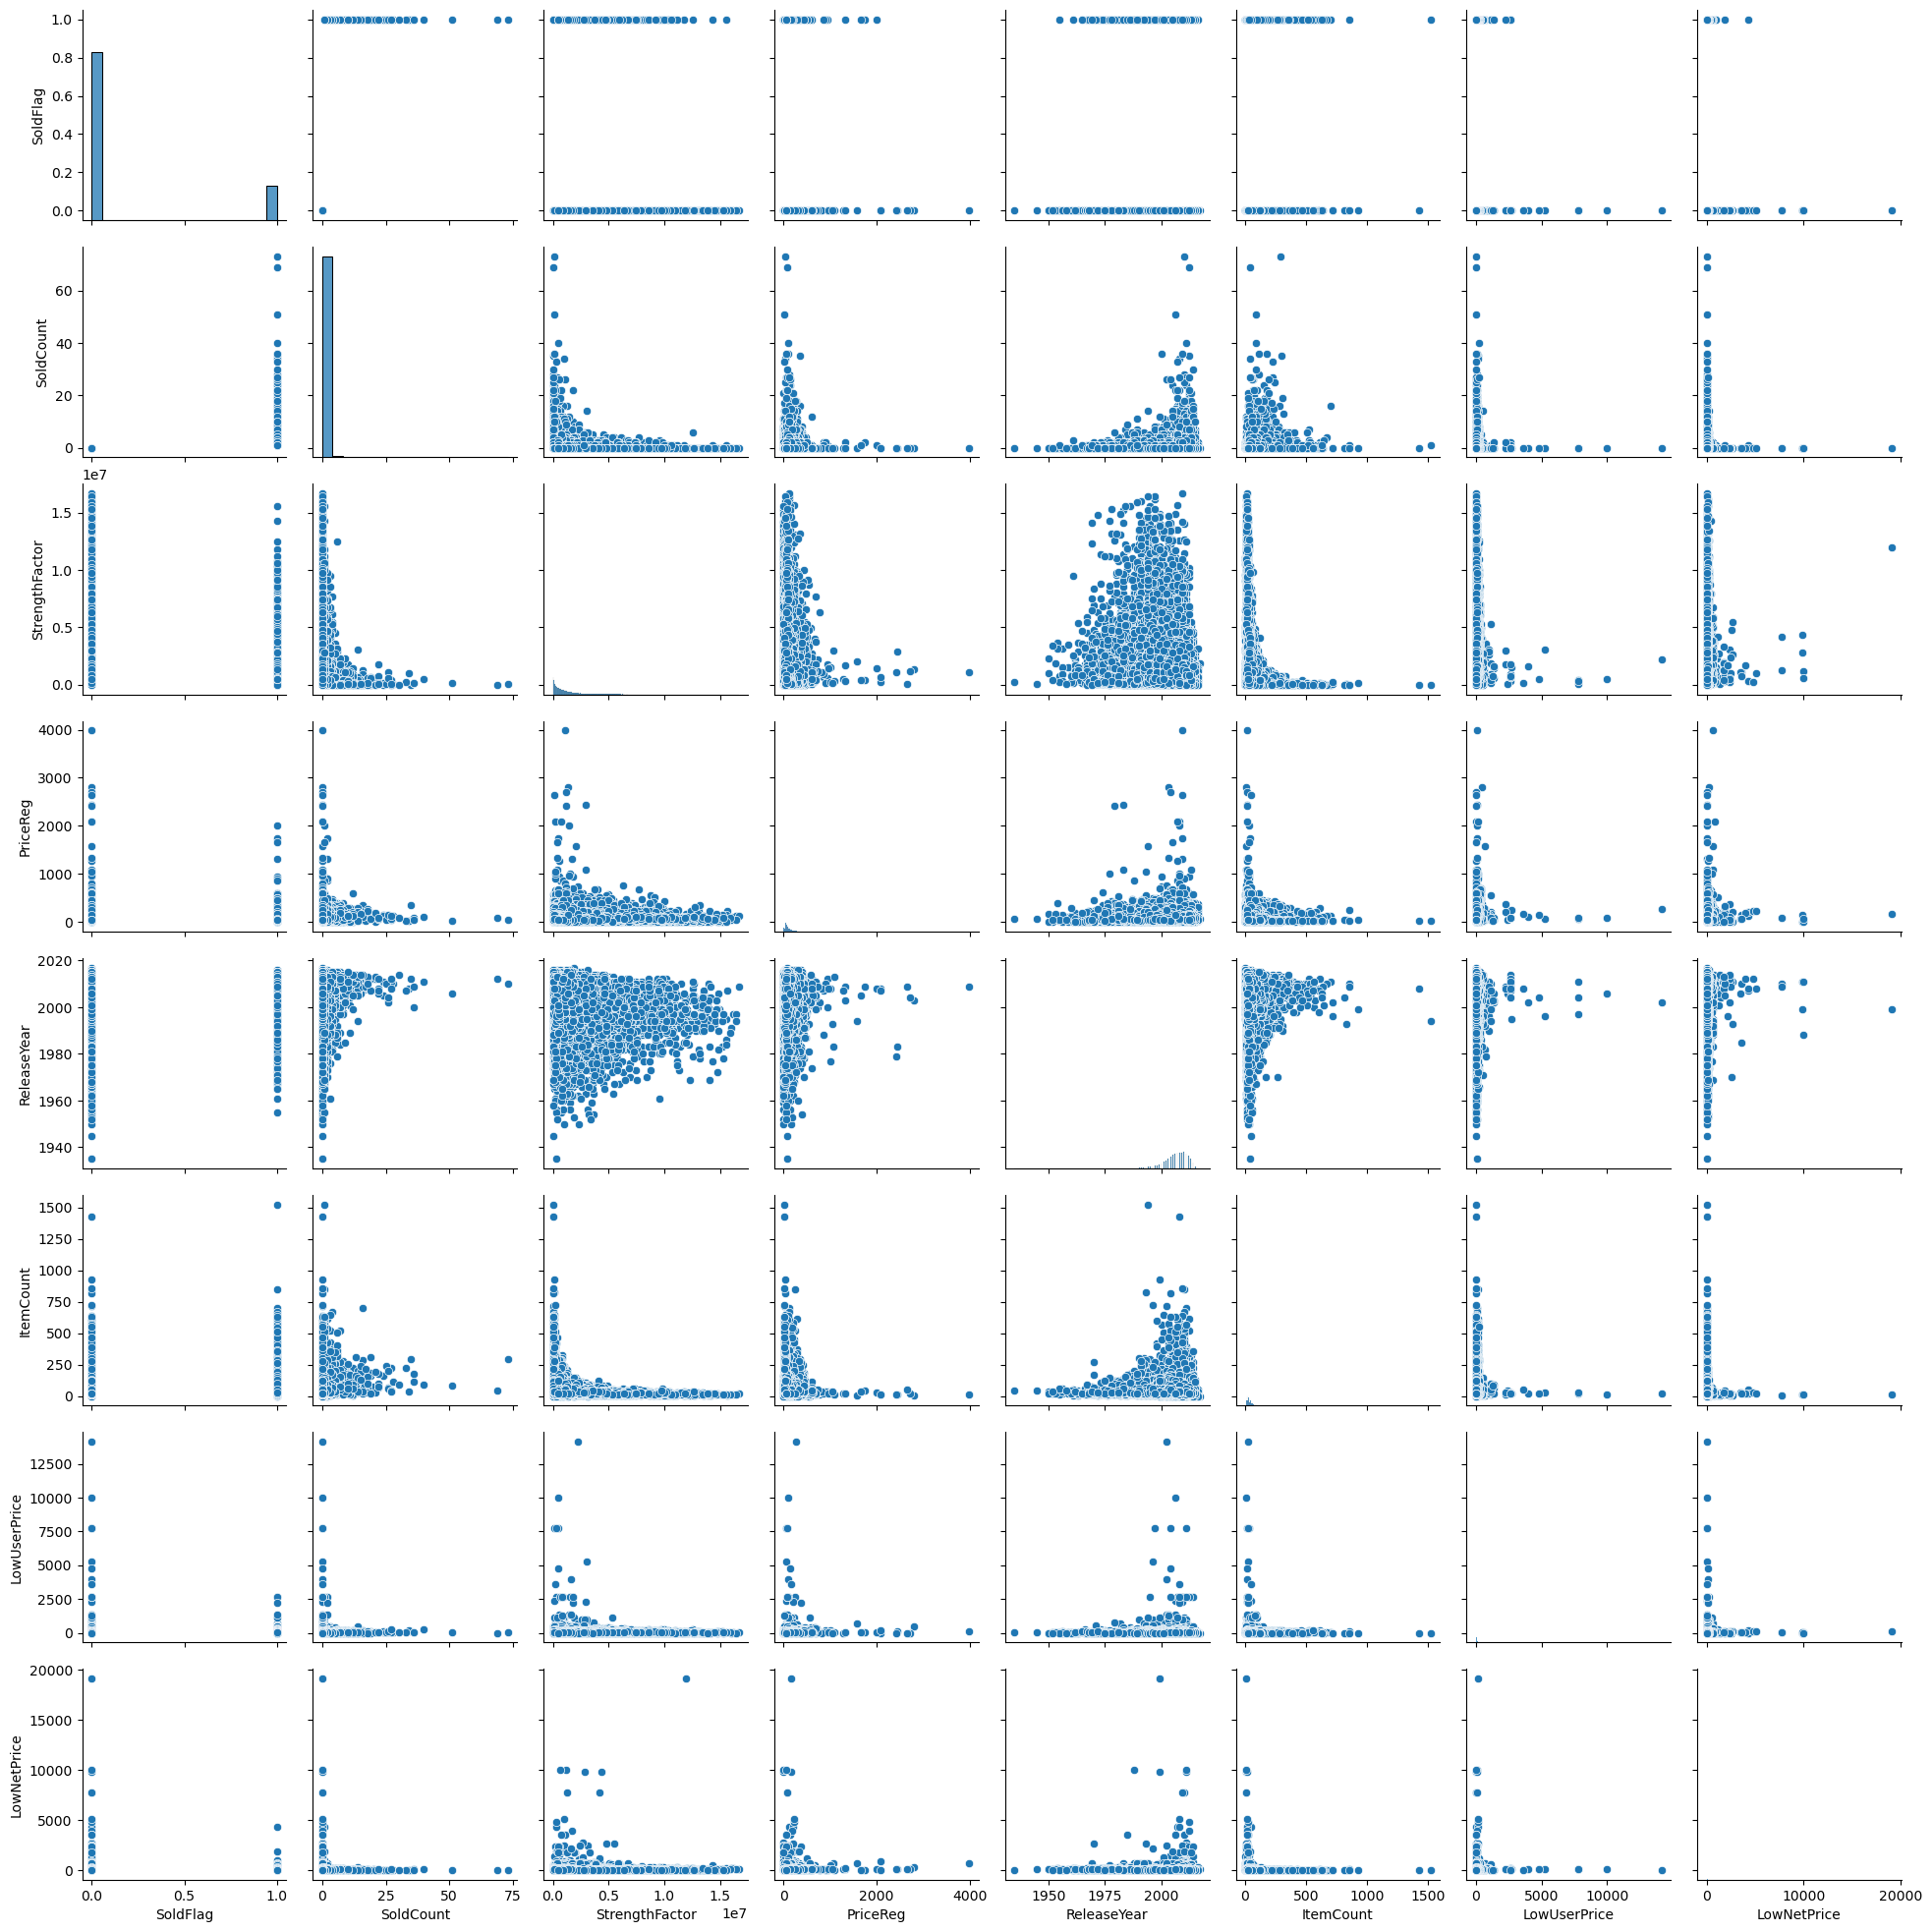

In [21]:
hist_data = hist_data.drop(['Order', 'File_Type','SKU_number','MarketingType','ReleaseNumber','New_Release_Flag'], axis=1)
sns.pairplot(hist_data)

<Axes: >

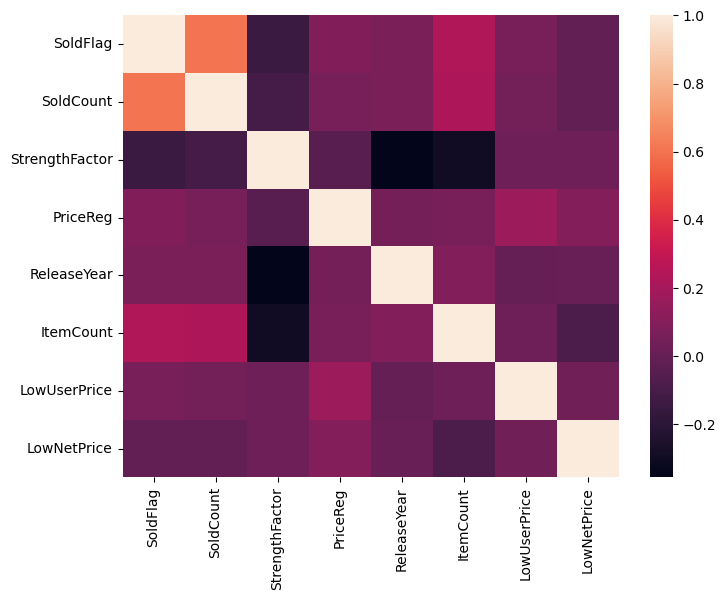

In [22]:
f, ax = plt.subplots(figsize=(8, 6))
corr = hist_data.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

In [23]:
# Drop rows/columns with too many missing values or fill them with appropriate values
df = df.dropna()

# df = df[df['File_Type'] == 'Historical']
# # Shuffle Data
df = df.sample(frac = 1.0, random_state = 1)

In [24]:
# Fill missing values
df['SoldFlag'].fillna(df['SoldFlag'].mean(), inplace=True)  # Replace with the mean for numerical
df['SoldCount'].fillna(df['SoldCount'].mean(), inplace=True)  # Replace with the mean for numerical

In [25]:
# Drop Unused Columns
# df = df.drop(['Order','File_Type', 'SKU_number'], axis = 1)
df = df.drop(['Order','File_Type', 'SKU_number', 'SoldCount'], axis = 1)
# df = df.drop(['Order','File_Type', 'SKU_number', 'SoldCount', 'MarketingType', 'ReleaseNumber', 
#               'New_Release_Flag', 'StrengthFactor', 'PriceReg', 'ReleaseYear', 'ItemCount', 
#               'LowNetPrice'], axis = 1)

In [26]:
# Checking again for missing values to confirm all are handled
print("\nMissing Values After Handling:")
print(df.isnull().sum())


Missing Values After Handling:
SoldFlag            0
MarketingType       0
ReleaseNumber       0
New_Release_Flag    0
StrengthFactor      0
PriceReg            0
ReleaseYear         0
ItemCount           0
LowUserPrice        0
LowNetPrice         0
dtype: int64


In [27]:
# Encoded categorical variables using LabelEncoder
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

df.head()

,SoldFlag,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice
37862,0.0,1,12,1,545082.0,96.67,2011,12,73.74,101.33
35304,0.0,1,2,1,4273940.0,58.00,2002,32,85.60,23.98
26138,0.0,0,9,1,165834.0,76.95,2011,48,75.57,42.67
52327,0.0,1,22,1,79220.0,54.25,2012,31,36.47,22.49
6038,0.0,0,8,1,80014.0,38.99,2008,62,153.24,69.43


In [28]:
# Splitting
X = df.drop(['SoldFlag'], axis=1)  # Features(X)
y = df['SoldFlag']             # Target(y)

In [29]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Display shapes of the datasets
print(f"Training Data Shape: {X_train.shape}")
print(f"Testing Data Shape: {X_test.shape}")

Training Data Shape: (60796, 9)
Testing Data Shape: (15200, 9)


In [31]:
scaler = StandardScaler()

# Fit the scaler on training data and transform both train and test data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
# Training the Model using Random Forest since it have an imbalenced dataset
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [33]:
# Make predictions
y_pred = model.predict(X_test)

In [34]:
# Accuracy Score
accuracy_1 = accuracy_score(y_test, y_pred)
print(f'Accuracy Score(RFC): {accuracy_1 * 100:.2f}%')
# print(f'Accuracy Score : {round(accuracy_1,2)*100}%')

# F1 score
f1_score_1 = f1_score(y_test, y_pred, pos_label = 1.0)
print(f'F1 Score(RFC) : {round(f1_score_1, 4)}')

Accuracy Score(RFC): 83.66%
F1 Score(RFC) : 0.2437


In [35]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.85      0.97      0.91     12670
         1.0       0.53      0.16      0.24      2530

    accuracy                           0.84     15200
   macro avg       0.69      0.57      0.58     15200
weighted avg       0.80      0.84      0.80     15200



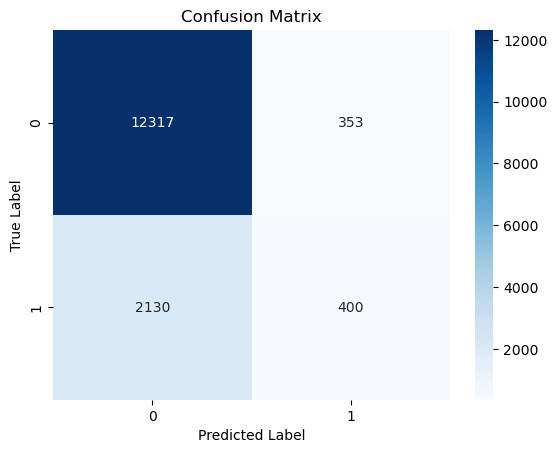

In [36]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Models with Pipeline and Random Forest Classifier

In [37]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
# Convert to DataFrame to retain column names
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [39]:
# Display shapes of the datasets
print(f"Training Data Shape: {X_train.shape}")
print(f"Testing Data Shape: {X_test.shape}")

Training Data Shape: (60796, 9)
Testing Data Shape: (15200, 9)


In [40]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [41]:
# Separate numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

In [ ]:
# preprocessing pipeline for numerical and categorical data

In [42]:
# Preprocessing for numerical data
# Imputer - Missing numerical values are replaced with the median of the respective columns.
# scaler - Features are standardized to have a mean of 0 and a variance of 1, improving model performance.
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [43]:
# Preprocessing for categorical data
# Imputer: Missing categorical values are replaced with the most frequent (mode) value of the column.
# Encoder: Converts categorical data into numerical format using one-hot encoding (producing binary columns for each category).
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [44]:
# Combine preprocessing steps
# Applies numerical transformations to columns in numerical_cols and categorical transformations to columns in categorical_cols.
# Combines both transformations using ColumnTransformer.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

In [45]:
# Create a pipeline with preprocessing and RandomForestClassifier
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [46]:
# Train the model using pipeline
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['ReleaseNumber', 'New_Release_Flag', 'StrengthFactor', 'PriceReg',
       'ReleaseYear', 'ItemCount', 'LowUserPrice', 'LowNetPrice'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index([], dtype='object'))])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [47]:
# Make predictions
y_pred = model_pipeline.predict(X_test)

In [48]:
# Evaluate the model
accuracy_2 = accuracy_score(y_test, y_pred)
f1_score_2 = f1_score(y_test, y_pred)
print(f'Accuracy(Pipeline with RFC): {accuracy_2 * 100:.2f}%')
print(f'F1 Score(Pipeline with RFC): {f1_score_2:.2f}')

Accuracy(Pipeline with RFC): 83.54%
F1 Score(Pipeline with RFC): 0.19


In [49]:
# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.98      0.91     12670
         1.0       0.52      0.12      0.19      2530

    accuracy                           0.84     15200
   macro avg       0.69      0.55      0.55     15200
weighted avg       0.79      0.84      0.79     15200



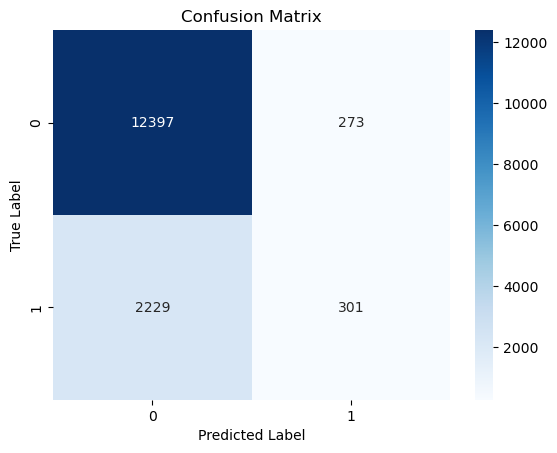

In [50]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Model with SMOTE + Random Forest classifier

In [55]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
print("Original Dataset Class Distribution:", y_train.value_counts())

Original Dataset Class Distribution: SoldFlag
0.0    50330
1.0    10466
Name: count, dtype: int64


In [57]:
from imblearn.over_sampling import SMOTE

In [58]:
# SMOTE generates(oversample) new minority samples between existing samples.
# After applying SMOTE, training data will have a balanced distribution of classes.
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [59]:
print("After SMOTE Class Distribution: ", pd.Series(y_train_resampled).value_counts())

After SMOTE Class Distribution:  SoldFlag
0.0    50330
1.0    50330
Name: count, dtype: int64


In [60]:
# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_resampled, y_train_resampled)
# Training the Model using Random Forest since it have an imbalenced dataset

RandomForestClassifier(random_state=42)

In [61]:
# Make predictions
y_pred = model.predict(X_test)

In [62]:
accuracy_3 = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy_3 * 100:.2f}%')

Accuracy: 76.86%


In [63]:
f1_score_3 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1_score_3:.2f}')

F1 Score: 0.43


In [64]:
print("Classification Report: \n", classification_report(y_test, y_pred))

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.89      0.82      0.85     12670
         1.0       0.36      0.52      0.43      2530

    accuracy                           0.77     15200
   macro avg       0.63      0.67      0.64     15200
weighted avg       0.81      0.77      0.78     15200



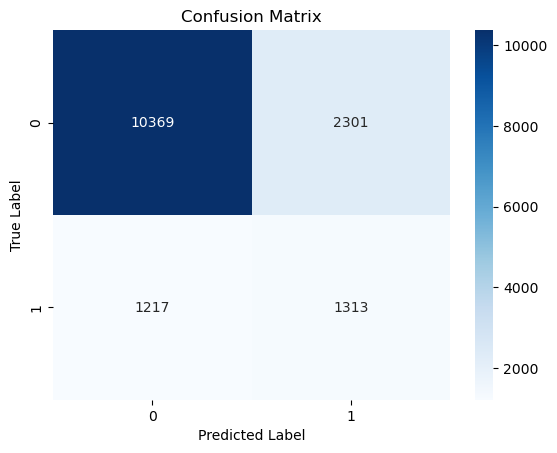

In [65]:
confusion_matrix_3 = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix_3, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [66]:
pred = model.predict(X)

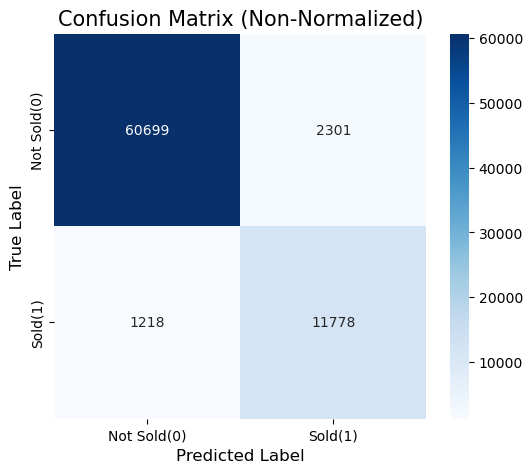

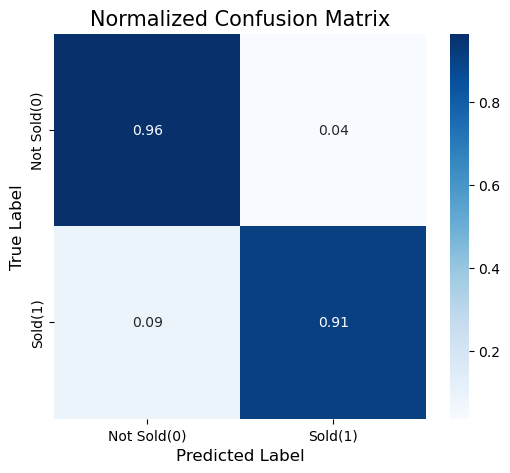

In [67]:
class_names = ['Not Sold(0)', 'Sold(1)']

# Compute confusion matrix
cnf_matrix = confusion_matrix(y, pred)

# Plotting function
def plot_conf_matrix(cm, title='Confusion Matrix', normalize=False):
    plt.figure(figsize=(6, 5))
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title = 'Normalized ' + title

    sns.heatmap(cm, annot=True, fmt='.2f' if normalize else 'd', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title(title, fontsize=15)
    plt.xlabel('Predicted Label', fontsize=12)
    plt.ylabel('True Label', fontsize=12)
    plt.show()

# Plotting both confusion matrices
plot_conf_matrix(cnf_matrix, title='Confusion Matrix (Non-Normalized)')
plot_conf_matrix(cnf_matrix, title='Confusion Matrix', normalize=True)

## Model using Autogluon 

In [1]:
!pip install autogluon

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached numpy-1.26.4-cp311-cp311-win_amd64.whl.metadata (61 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
INFO: pip is looking at multiple versions of torchvision to determine which version is compatible with other requirements. This could take a while.
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
INFO: pip is looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: This is ta

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 19.0.1 which is incompatible.
pyfume 0.3.4 requires numpy==1.24.4, but you have numpy 1.26.4 which is incompatible.
pyfume 0.3.4 requires pandas==1.5.3, but you have pandas 2.2.3 which is incompatible.
pyfume 0.3.4 requires scipy==1.10.1, but you have scipy 1.15.2 which is incompatible.
tensorflow-intel 2.16.1 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.20.3, but you have protobuf 5.29.4 which is incompatible.
torchaudio 2.1.2+cu121 requires torch==2.1.2+cu121, but you have torch 2.5.1 which is incompatible.


In [3]:
from autogluon.tabular import TabularPredictor
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('D:/WittingAI/dataset/SalesKaggle3.csv')

# target column is 
target = 'SoldFlag'

# Drop rows with missing target
df = df.dropna(subset=[target])

# Train-test split
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# Initialize the AutoGluon predictor
predictor = TabularPredictor(label=target, eval_metric='f1', problem_type='binary').fit(
    train_data=train_data, 
    presets='best_quality',  # Use 'best_quality' for best accuracy, 'medium_quality_faster_train' for faster training
    time_limit=600  # Time limit in seconds for training
)

# Evaluate the model
results = predictor.evaluate(test_data)
print("Performance Metrics:", results)

# Make predictions on test data
preds = predictor.predict(test_data)
print(preds)


No path specified. Models will be saved in: "AutogluonModels\ag-20250402_043144"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.7
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22631
CPU Count:          16
Memory Avail:       2.63 GB / 15.42 GB (17.1%)
Disk Space Avail:   25.60 GB / 175.78 GB (14.6%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be fit on subsets of the data. Then holdout v

(_ray_fit pid=19140) [1000]	valid_set's binary_logloss: 0.0138382	valid_set's f1: 0.999565


(_dystack pid=27028) 	0.9998	 = Validation score   (f1)
(_dystack pid=27028) 	17.58s	 = Training   runtime
(_dystack pid=27028) 	1.07s	 = Validation runtime
(_dystack pid=27028) Fitting model: LightGBM_BAG_L1 ... Training model for up to 61.85s of the 107.75s of remaining time.
(_dystack pid=27028) 	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (8 workers, per: cpus=2, gpus=0, memory=1.64%)
(_dystack pid=27028) 	1.0	 = Validation score   (f1)
(_dystack pid=27028) 	3.46s	 = Training   runtime
(_dystack pid=27028) 	0.03s	 = Validation runtime
(_dystack pid=27028) Fitting model: RandomForestGini_BAG_L1 ... Training model for up to 52.22s of the 98.12s of remaining time.
(_dystack pid=27028) 	1.0	 = Validation score   (f1)
(_dystack pid=27028) 	3.02s	 = Training   runtime
(_dystack pid=27028) 	1.34s	 = Validation runtime
(_dystack pid=27028) Fitting model: RandomForestEntr_BAG_L1 ... Training model for up to 47.63s of the 93.53s of remaining time.
(_d

Performance Metrics: {'f1': 1.0, 'accuracy': 1.0, 'balanced_accuracy': 1.0, 'mcc': 1.0, 'roc_auc': 1.0, 'precision': 1.0, 'recall': 1.0}
53729    0.0
61110    0.0
61139    0.0
56926    0.0
20979    0.0
        ... 
44503    0.0
21165    0.0
11310    0.0
37587    0.0
57436    0.0
Name: SoldFlag, Length: 15200, dtype: float64


In [4]:
from sklearn.metrics import accuracy_score, f1_score

# True labels and predicted labels
y_true = test_data[target]
y_pred = predictor.predict(test_data)

# Calculate Accuracy and F1 Score
accuracy = accuracy_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'F1 Score: {f1:.4f}')


Accuracy: 100.00%
F1 Score: 1.0000


In [51]:
predictor.leaderboard()

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,LightGBM_BAG_L1,1.000000,f1,0.045537,3.420079,0.045537,3.420079,1,True,4
1,CatBoost_BAG_L1,1.000000,f1,0.137303,39.879827,0.137303,39.879827,1,True,7
2,XGBoost_BAG_L1,1.000000,f1,0.151210,4.843504,0.151210,4.843504,1,True,11
3,NeuralNetTorch_BAG_L1,1.000000,f1,0.602738,53.271856,0.602738,53.271856,1,True,12
4,NeuralNetFastAI_BAG_L1,1.000000,f1,1.317387,106.181841,1.317387,106.181841,1,True,10
5,RandomForestGini_BAG_L1,1.000000,f1,1.372859,3.323014,1.372859,3.323014,1,True,5
6,RandomForestEntr_BAG_L1,1.000000,f1,1.455541,2.921189,1.455541,2.921189,1,True,6
7,ExtraTreesGini_BAG_L1,1.000000,f1,2.045705,2.645912,2.045705,2.645912,1,True,8
8,WeightedEnsemble_L2,1.000000,f1,2.067749,9.337186,0.022043,6.691274,2,True,13
9,LightGBM_BAG_L2,1.000000,f1,10.843436,241.081881,0.056535,3.632178,2,True,15


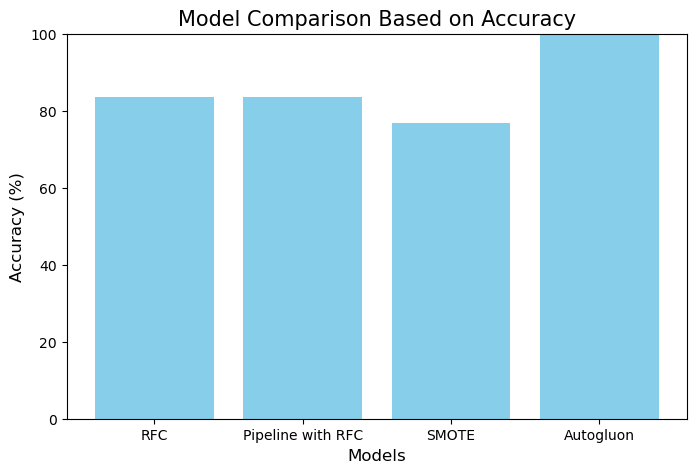

In [53]:
models = ['RFC', 'Pipeline with RFC', 'SMOTE', 'Autogluon']
accuracies = [83.66, 83.54, 76.86,100.00]

# Plotting
plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color='skyblue')

# Labels and Title
plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.title('Model Comparison Based on Accuracy', fontsize=15)
plt.ylim(0, 100)

plt.show()

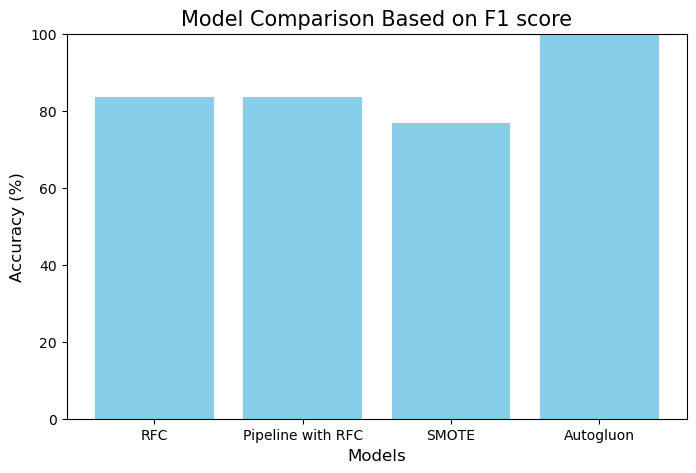

In [54]:
models = ['RFC', 'Pipeline with RFC', 'SMOTE', 'Autogluon']
f1_scores = [24.37, 19.00, 43.00, 100]  

# Plotting
plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color='skyblue')

# Labels and Title
plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.title('Model Comparison Based on F1 score', fontsize=15)
plt.ylim(0, 100)

plt.show()